In [1]:
# Import the Tokenizer class from TensorFlow's Keras preprocessing module for text processing
from tensorflow.keras.preprocessing.text import Tokenizer

# Define a list of example sentences to be tokenized
sentences = [
    'i love my dog',      # Sentence 1: Lowercase sentence without punctuation
    'I, love my cat',     # Sentence 2: Includes a comma after 'I'
    'You love my dog!'    # Sentence 3: Includes an exclamation mark at the end
]

# Create an instance of the Tokenizer class
# 'num_words' specifies the maximum number of words to keep based on their frequency
# The most common 'num_words' words will be retained, and words not in this range are discarded
tokenizer = Tokenizer(num_words = 100)

# Fit the tokenizer on the provided list of sentences
# This step calculates the frequency of each word in the text and assigns an index to each word
tokenizer.fit_on_texts(sentences)

# Retrieve the word index generated by the tokenizer, which is a dictionary mapping words to their indices
word_index = tokenizer.word_index

# Print the resulting word index
print(word_index)


{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [2]:
# Import the necessary libraries and modules
import json  # Allows working with JSON data (not used directly here but useful for saving/loading configurations)
import tensorflow as tf  # TensorFlow for deep learning operations

# Importing the Tokenizer and pad_sequences classes from TensorFlow's Keras preprocessing module
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing the datetime module (not used directly here, but useful for time-stamping data or logs)
import datetime

# Define a list of example sentences to work with
sentences = [
    'I love my dog',                   # Sentence 1
    'I love my cat',                   # Sentence 2
    'You love my dog!',                # Sentence 3
    'Do you think my dog is amazing?'  # Sentence 4 (includes punctuation and multiple words)
]

# Create an instance of the Tokenizer class with a specified number of words to keep (100)
# We also define an Out-Of-Vocabulary token (oov_token) as "<OOV>" for handling words not in the training set
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# Fit the tokenizer on the defined list of sentences
# This will compute the frequency of each word in the text and assign unique indices
tokenizer.fit_on_texts(sentences)

# Retrieve the word index dictionary that maps words to their unique indices
word_index = tokenizer.word_index

# Convert the sentences into sequences of integers based on the word index generated by the tokenizer
sequences = tokenizer.texts_to_sequences(sentences)

# Explanation:
# Each word in the sentence is replaced by its corresponding index in the word index.
# If a word is not in the word index, it will be replaced by the index of the OOV token.

# Pad the sequences to ensure they all have the same length
# The 'maxlen' parameter specifies the length to which each sequence will be padded
# Shorter sequences are padded with zeros, while longer sequences are truncated to fit the specified maxlen
padded = pad_sequences(sequences, maxlen=5)

# Print the word index dictionary to see the mapping of words to indices
print("\nWord Index = ", word_index)

# Print the sequences of integers representing each sentence
print("\nSequences = ", sequences)

# Print the paddedZ sequences to observe the uniform length of each sequence
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2024-10-31 06:46:14--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2024-10-31 06:46:14 (111 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [5]:
# Open the JSON file and read its content
# The 'r' mode opens the file in read mode
with open("/tmp/sarcasm.json", 'r') as f:
    # Load the content of the JSON file into a Python dictionary or list (depending on the JSON structure)
    datastore = json.load(f)

# Initialize empty lists to hold the sentences (headlines) and labels
sentences = []
labels = []

# Loop through each item in the datastore (assuming it's a list of dictionaries)
for item in datastore:
    # Append the value of the 'headline' key from each item to the sentences list
    sentences.append(item['headline'])

    # Append the value of the 'is_sarcastic' key from each item to the labels list
    labels.append(item['is_sarcastic'])

# Now, 'sentences' contains all the headlines from the dataset, and 'labels' contains their corresponding labels

In [6]:
# Define the vocabulary size, which determines the maximum number of unique words to be considered
# This is typically set based on the dataset and the expected diversity of vocabulary
vocab_size = 10000  # Same as the number of words to be kept in the Tokenizer

# Define the dimension of the embedding layer
# This represents the size of the dense vector representation for each word in the vocabulary
embedding_dim = 16  # A smaller size like 16 is often used for demonstration purposes

# Set the maximum length of input sequences
# Any sequence longer than this will be truncated, and shorter sequences will be padded
max_length = 100  # This means that all input sequences will be of length 100

# Define the truncation type for sequences that exceed the maximum length
# 'post' means truncation will happen from the end of the sequence
trunc_type = 'post'  # Alternatives could be 'pre' to truncate from the beginning

# Define the padding type for sequences that are shorter than the maximum length
# 'post' means that padding will be added at the end of the sequence
padding_type = 'post'  # Alternatives could be 'pre' to add padding at the beginning

# Define the Out-Of-Vocabulary (OOV) token to handle words that are not in the vocabulary
# This token will replace any unknown words during the tokenization process
oov_tok = "<OOV>"  # This helps in managing words that the model has not seen

# Specify the training size, which determines how many samples will be used for training the model
training_size = 20000  # This is often set based on the dataset size and available data

In [7]:
# Create training and testing datasets from the sentences
# The training set includes the first 'training_size' number of sentences
training_sentences = sentences[0:training_size]

# The testing set includes the sentences from 'training_size' to the end of the list
testing_sentences = sentences[training_size:]

# Create training and testing labels corresponding to the sentences
# The training labels include the first 'training_size' number of labels
training_labels = labels[0:training_size]

# The testing labels include the labels from 'training_size' to the end of the list
testing_labels = labels[training_size:]

In [8]:
training_labels[4]

0

In [9]:
# Initialize the Tokenizer with the specified number of words and OOV token
# 'num_words=10000' specifies that only the top 10,000 words will be considered
# 'oov_token' handles any words that are not found in the vocabulary
tokenizer = Tokenizer(num_words=10000, oov_token=oov_tok)

# Fit the tokenizer on the training sentences to learn the word index
# This builds the internal vocabulary based on the training data
tokenizer.fit_on_texts(training_sentences)

# Retrieve the word index, which is a dictionary mapping words to their integer indices
word_index = tokenizer.word_index

# Convert the training sentences into sequences of integers
# Each word in the sentences is replaced by its corresponding index from the word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)

# Pad the training sequences to ensure they all have the same length
# 'maxlen' specifies the maximum length of sequences, while 'padding' and 'truncating' specify how to handle shorter and longer sequences
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the testing sentences into sequences of integers using the same tokenizer
# This ensures that the testing set uses the same word indices as the training set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# Pad the testing sequences to ensure they all have the same length, similar to the training set
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
# Import the NumPy library, which provides support for large, multi-dimensional arrays and matrices
import numpy as np

# Convert the training padded sequences into a NumPy array
# This is necessary because TensorFlow models require input data to be in a numerical array format
training_padded = np.array(training_padded)

# Convert the training labels into a NumPy array
# This ensures that the labels are also in the correct format for TensorFlow models
training_labels = np.array(training_labels)

# Convert the testing padded sequences into a NumPy array
# Similar to training padded, this conversion is needed for the model to accept the input data
testing_padded = np.array(testing_padded)

# Convert the testing labels into a NumPy array
# This prepares the labels for evaluation or testing in the TensorFlow model
testing_labels = np.array(testing_labels)


In [11]:
# Create a sequential model using Keras
model = tf.keras.Sequential([
    # Embedding layer converts integer word indices to dense vector representations
    # 'vocab_size': size of the vocabulary
    # 'embedding_dim': dimension of the dense vectors
    # 'input_length': the length of input sequences
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # GlobalAveragePooling1D layer reduces the output from the embedding layer
    # It averages the features for each input sequence, providing a fixed-size output
    tf.keras.layers.GlobalAveragePooling1D(),

    # Dense layer with 24 units and ReLU activation function
    # This layer is responsible for learning non-linear combinations of the features
    tf.keras.layers.Dense(24, activation='relu'),

    # Output layer with a single unit and sigmoid activation function
    # This layer produces the final prediction, suitable for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the specified loss function, optimizer, and evaluation metrics
# 'loss': binary crossentropy is used for binary classification tasks
# 'optimizer': Adam optimizer is efficient for many tasks and adjusts the learning rate
# 'metrics': accuracy is used to evaluate the model's performance during training and testing
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model's architecture, showing the layers and their configurations
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Import the datetime module to create a timestamp for logging
import datetime

# Define the log directory for TensorBoard
# This will create a unique directory for each training run, based on the current date and time
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Create a TensorBoard callback to log training metrics and visualize them in TensorBoard
# 'histogram_freq=1' enables logging of histograms of weights every epoch
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model using the fit method
# - training_padded: the padded input sequences for training
# - training_labels: the labels corresponding to the training data
# - epochs: the number of times the entire training dataset is passed through the model (30 in this case)
# - validation_data: a tuple of testing padded sequences and labels for validation during training
# - verbose=2: prints a progress bar with one line per epoch
# - callbacks: the list of callbacks to apply during training, including TensorBoard
history = model.fit(
    training_padded,                # Input training data
    training_labels,                # Corresponding training labels
    epochs=30,                      # Number of epochs to train the model
    validation_data=(testing_padded, testing_labels),  # Data for validation
    verbose=2,                      # Verbosity mode, 2 will give one line per epoch
    callbacks=[tensorboard_callback]  # List of callbacks to apply
)

Epoch 1/30
625/625 - 7s - 12ms/step - accuracy: 0.5630 - loss: 0.6795 - val_accuracy: 0.4776 - val_loss: 0.6855
Epoch 2/30
625/625 - 7s - 11ms/step - accuracy: 0.7421 - loss: 0.5338 - val_accuracy: 0.7120 - val_loss: 0.5317
Epoch 3/30
625/625 - 5s - 8ms/step - accuracy: 0.8340 - loss: 0.3906 - val_accuracy: 0.8296 - val_loss: 0.3937
Epoch 4/30
625/625 - 5s - 8ms/step - accuracy: 0.8579 - loss: 0.3363 - val_accuracy: 0.8304 - val_loss: 0.3792
Epoch 5/30
625/625 - 4s - 6ms/step - accuracy: 0.8712 - loss: 0.3086 - val_accuracy: 0.8201 - val_loss: 0.3886
Epoch 6/30
625/625 - 4s - 7ms/step - accuracy: 0.8911 - loss: 0.2717 - val_accuracy: 0.8354 - val_loss: 0.3650
Epoch 7/30
625/625 - 5s - 8ms/step - accuracy: 0.8947 - loss: 0.2553 - val_accuracy: 0.8557 - val_loss: 0.3443
Epoch 8/30
625/625 - 6s - 9ms/step - accuracy: 0.9011 - loss: 0.2394 - val_accuracy: 0.8389 - val_loss: 0.3657
Epoch 9/30
625/625 - 4s - 7ms/step - accuracy: 0.9078 - loss: 0.2252 - val_accuracy: 0.8509 - val_loss: 0.3517

In [13]:
# Define a list of sentences to be classified
sentence = [
    "granny starting to fear spiders in the garden might be real",
    "game of thrones season finale showing this sunday night"
]

# Convert the sentences into sequences of integers using the tokenizer
# Each word in the sentences is replaced with its corresponding index from the word index
sequences = tokenizer.texts_to_sequences(sentence)

# Pad the sequences to ensure they all have the same length
# 'maxlen' specifies the maximum length, and 'padding' and 'truncating' handle shorter and longer sequences
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Use the trained model to predict the class probabilities for the padded sequences
# The model outputs a probability between 0 and 1 for each input sentence
predictions = model.predict(padded)

# Print the predicted probabilities for the input sentences
print(predictions)

# Explanation of binary classification:
# - The model is set up for binary classification, where:
#   - A predicted value closer to 0 indicates a non-sarcastic sentence
#   - A predicted value closer to 1 indicates a sarcastic sentence
# Depending on a threshold (commonly 0.5), you can classify the sentences as sarcastic or non-sarcastic


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.984004  ]
 [0.15645619]]


In [14]:
padded[0]

array([   1,  890,    2,  891,    1,    5,    4, 2565,  380,   22,  178,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [15]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


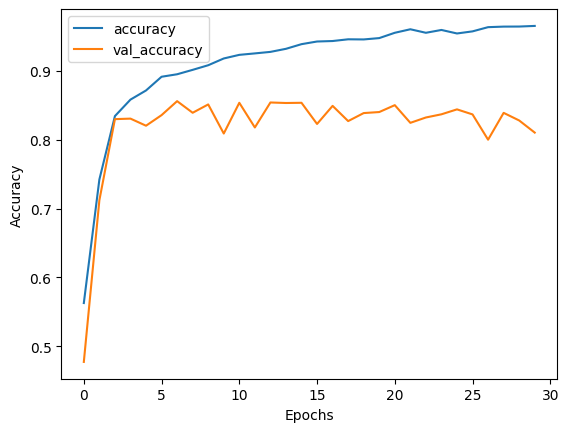

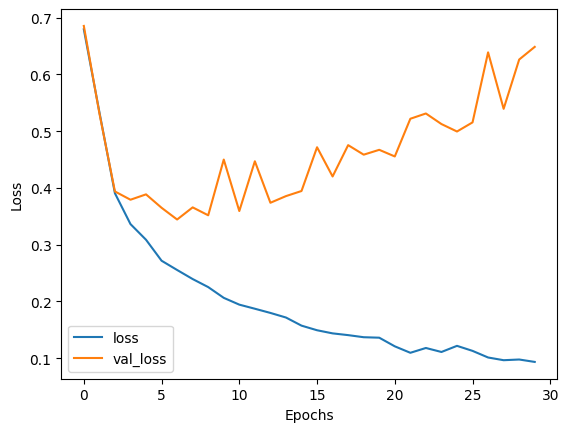

In [16]:
import matplotlib.pyplot as plt

# Define a function to plot training and validation graphs
def plot_graphs(history, string):
    # Plot the training metrics (e.g., accuracy or loss)
    plt.plot(history.history[string], label=string)  # Plot training metric
    plt.plot(history.history['val_' + string], label='val_' + string)  # Plot validation metric

    # Set the x-axis label as "Epochs"
    plt.xlabel("Epochs")

    # Set the y-axis label according to the metric being plotted (accuracy or loss)
    plt.ylabel(string.capitalize())  # Capitalize the metric name for better readability

    # Add a legend to differentiate between training and validation
    plt.legend()

    # Display the plot
    plt.show()

# Plot the training and validation accuracy
plot_graphs(history, "accuracy")

# Plot the training and validation loss
plot_graphs(history, "loss")
